In [1]:
import torch
from datasets.SwitchAttractorDataset import SwitchAttractorDataset
import esn
import utils
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
import numpy as np
# import mdp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset params
train_sample_length = 10000
test_sample_length = 1000
n_train_samples = 100
n_test_samples = 10
batch_size = 1
spectral_radius = 0.9
leaky_rate = 1.0
input_dim = 1
n_hidden = 100
w_sparsity=0.1

# Manual seed
np.random.seed(2)
torch.manual_seed(1)

In [3]:
# Switch attractor dataset
switch_train_dataset = SwitchAttractorDataset(train_sample_length, n_train_samples, seed=1)
switch_test_dataset = SwitchAttractorDataset(test_sample_length, n_test_samples, seed=10)

In [4]:
# Data loader
trainloader = DataLoader(switch_train_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = DataLoader(switch_test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [14]:
# Model Definition
model = esn.ESN(
    input_dim=input_dim,
    hidden_dim=n_hidden,
    output_dim=1,
    spectral_radius=spectral_radius,
    w_sparsity=w_sparsity,
    feedbacks=True
)

In [15]:
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [16]:
# Loss Function
def mse_loss(outputs, targets):
    loss = (outputs - targets)**2
    loss = torch.sum(loss, -1)
    return torch.mean(loss)   

## Teacher Forcing

In [19]:
for data in trainloader:
    optimizer.zero_grad()
    
    # Inputs and outputs
    inputs, targets = data

    # To variable
    inputs, targets = Variable(inputs), Variable(targets)
    # plt.plot(targets.data[0].numpy(), c='b')
    # plt.plot(y_predicted.data[0, :, 0].numpy(), c='r')
    # plt.show()
    outputs = model(inputs, targets)
    
    loss = mse_loss((outputs), targets)
    loss.backward()
    optimizer.step()
    
#     print(loss.data[0])

Process Process-17:
Process Process-18:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/torch/utils/data

KeyboardInterrupt: 

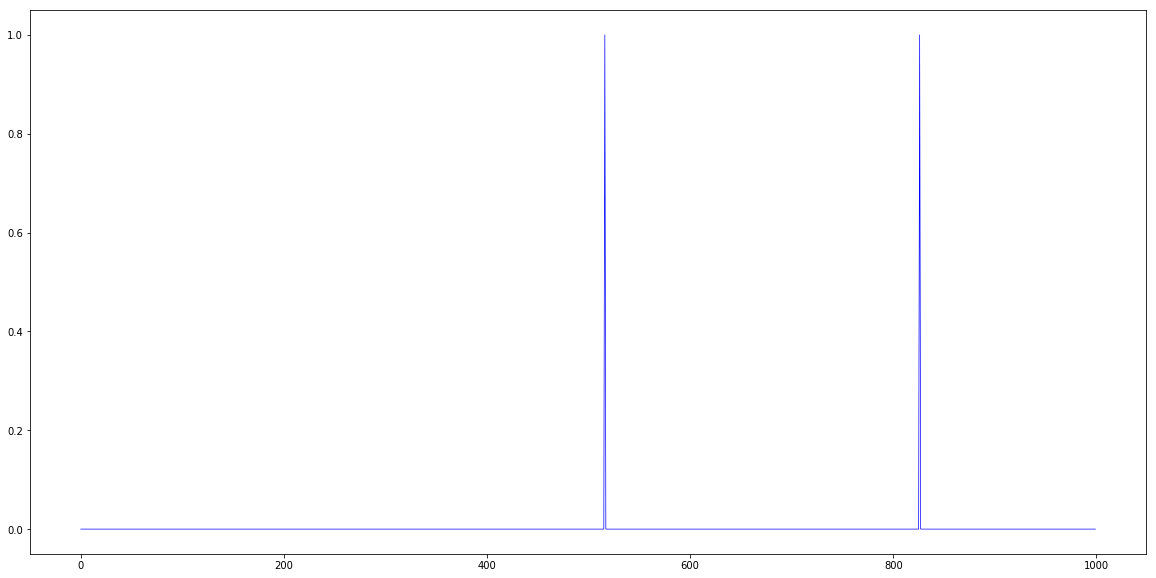

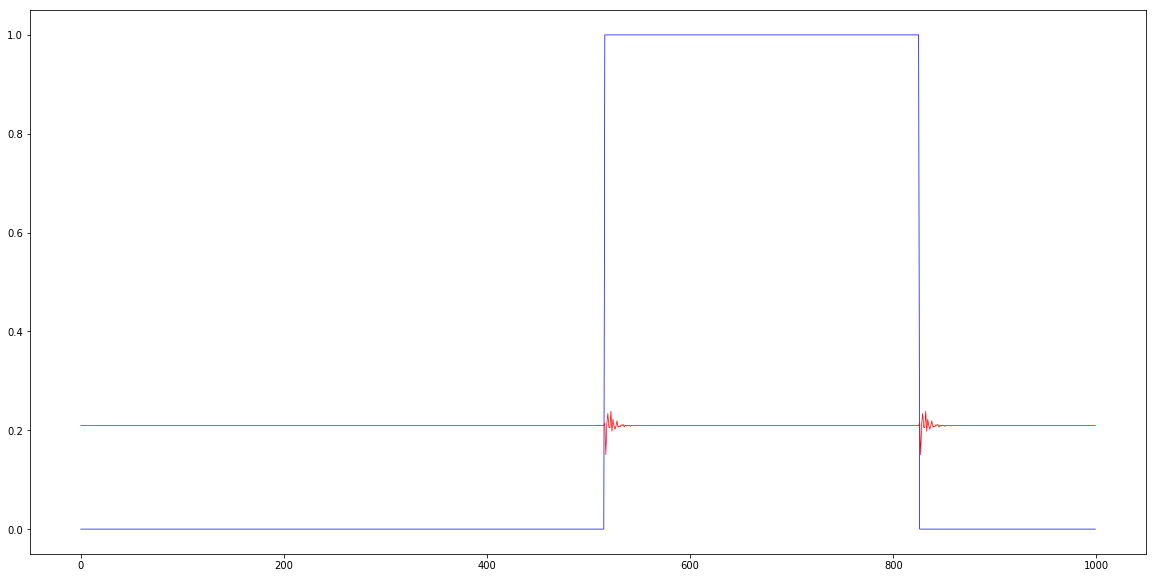

In [12]:
for data in testloader:
    # Test MSE
    test_u, test_y = data
    test_u, test_y = Variable(test_u), Variable(test_y)
    y_predicted = model(test_u)
    plt.figure(figsize=(20, 10))
    plt.plot(test_u.data[0].numpy(), c='b', linewidth=0.7)
    plt.show()
    plt.figure(figsize=(20, 10))
    plt.plot(test_y.data[0].numpy(), c='b', linewidth=0.7)
    plt.plot(y_predicted.data[0, :, 0].numpy(), c='r', linewidth=0.7)
    plt.show()
    break

## No Teacher Forcing

In [17]:
for data in trainloader:
    optimizer.zero_grad()
    
    # Inputs and outputs
    inputs, targets = data

    # To variable
    inputs, targets = Variable(inputs), Variable(targets)
    # plt.plot(targets.data[0].numpy(), c='b')
    # plt.plot(y_predicted.data[0, :, 0].numpy(), c='r')
    # plt.show()
    outputs = model(inputs)
    
    loss = mse_loss((outputs), targets)
    loss.backward()
    optimizer.step()
    
    print(loss.data[0])

tensor(2425.0908)
tensor(2374.8804)
tensor(2075.6155)
tensor(1696.4033)
tensor(2035.4193)
tensor(2089.4001)
tensor(1222.5038)
tensor(1998.1376)
tensor(2748.6370)
tensor(2326.0193)
tensor(1699.7959)
tensor(1072.1687)
tensor(1397.2708)
tensor(2459.1223)
tensor(1006.9136)
tensor(709.3676)
tensor(1409.1573)
tensor(2201.4722)
tensor(2332.5049)
tensor(2228.4341)
tensor(837.7155)
tensor(1568.4336)
tensor(1466.3058)
tensor(735.6879)
tensor(2788.0271)
tensor(2230.0369)
tensor(3137.2971)
tensor(1525.6528)
tensor(1972.1117)
tensor(1461.4845)
tensor(2180.7720)
tensor(628.0589)
tensor(2907.9517)
tensor(1686.3667)
tensor(840.7222)
tensor(2096.3057)
tensor(2697.6760)
tensor(2062.7925)
tensor(935.2867)
tensor(2571.3672)
tensor(964.4438)
tensor(2214.3550)
tensor(2242.4956)
tensor(1284.2794)
tensor(2034.3969)
tensor(2055.4626)
tensor(1422.1670)
tensor(1922.4836)
tensor(1861.7207)
tensor(2302.7302)
tensor(2054.6565)
tensor(2004.1230)
tensor(1049.5530)
tensor(1496.5935)
tensor(575.7166)
tensor(1083.1882)


/Users/YumaKajihara/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


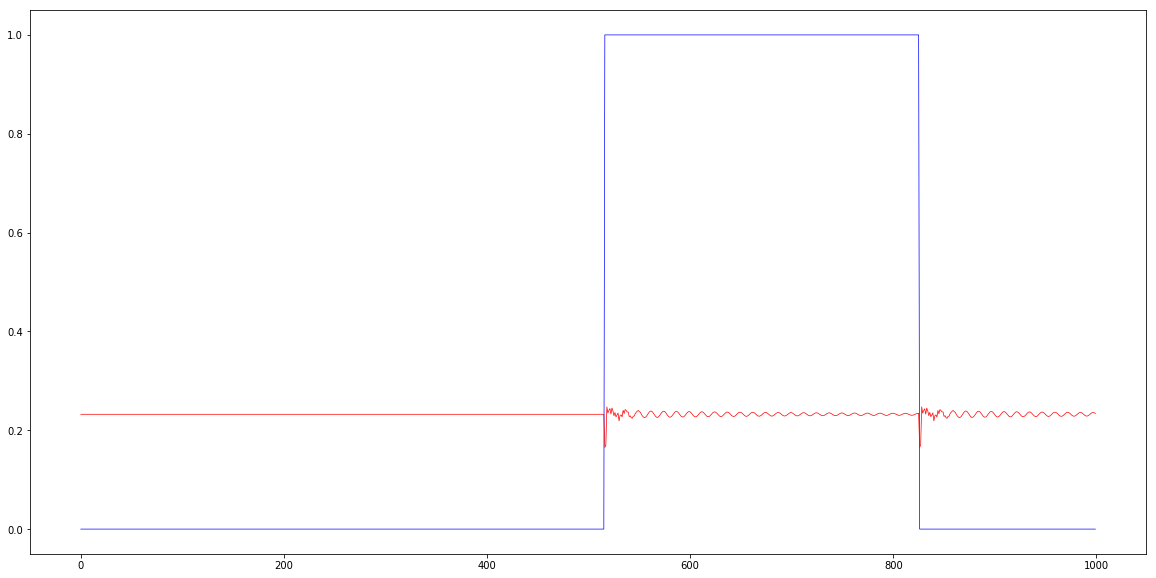

In [18]:
for data in testloader:
    # Test MSE
    test_u, test_y = data
    test_u, test_y = Variable(test_u), Variable(test_y)
    y_predicted = model(test_u)
    plt.figure(figsize=(20, 10))
    plt.plot(test_y.data[0].numpy(), c='b', linewidth=0.7)
    plt.plot(y_predicted.data[0, :, 0].numpy(), c='r', linewidth=0.7)
    plt.show()
    break